ΕΡΓΑΣΊΑ ΥΠΟΛΟΓΙΣΤΙΚΗΣ ΓΕΩΜΕΤΡΙΑΣ


**Υλοποίηση Α**

1.

Αυξητικός Αλγόριθμος


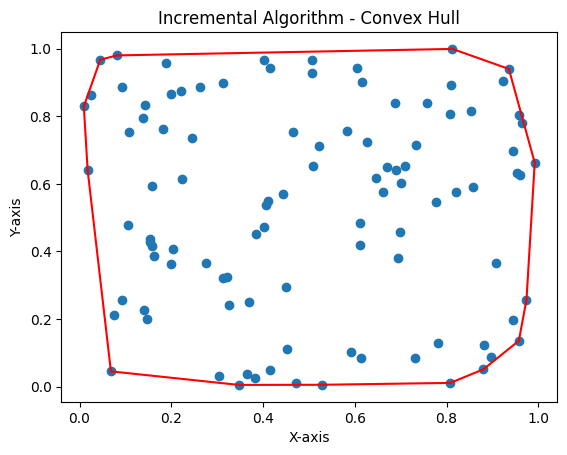

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def point_location(p, q, r):
    return (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])

def increment_algorithm(points):
    points = sorted(points)
    n = len(points)
    if n <= 3:
        return points

    upper_hull = []
    for point in points:
        while len(upper_hull) >= 2 and point_location(upper_hull[-2], upper_hull[-1], point) <= 0:
            upper_hull.pop()
        upper_hull.append(point)

    lower_hull = []
    for point in reversed(points):
        while len(lower_hull) >= 2 and point_location(lower_hull[-2], lower_hull[-1], point) <= 0:
            lower_hull.pop()
        lower_hull.append(point)

    return upper_hull[:-1] + lower_hull[:-1]

points = np.random.rand(100, 2)
hull = increment_algorithm(points.tolist())

plt.scatter(points[:, 0], points[:, 1])
for i in range(len(hull)):
    plt.plot([hull[i][0], hull[(i + 1) % len(hull)][0]], [hull[i][1], hull[(i + 1) % len(hull)][1]], 'r-')
plt.title("Incremental Algorithm - Convex Hull")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


Αλγόριθμος Περιτυλίγματος

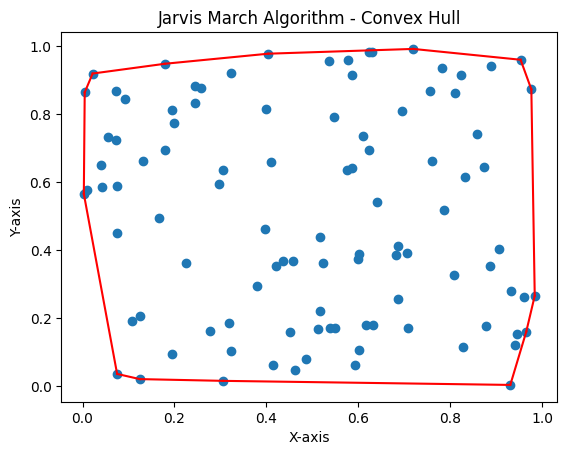

In [2]:
def jarvis_march(points):
    def leftmost_point(points):
        min_point = points[0]
        for point in points[1:]:
            if point[0] < min_point[0]:
                min_point = point
        return min_point

    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    hull = []
    leftmost = leftmost_point(points)
    current_point = leftmost
    while True:
        hull.append(current_point)
        next_point = points[0]
        for point in points:
            if point == current_point:
                continue
            if next_point == current_point or orientation(current_point, next_point, point) < 0:
                next_point = point
        current_point = next_point
        if current_point == leftmost:
            break

    return hull

points = np.random.rand(100, 2)
hull = jarvis_march(points.tolist())

plt.scatter(points[:, 0], points[:, 1])
for i in range(len(hull)):
    plt.plot([hull[i][0], hull[(i + 1) % len(hull)][0]], [hull[i][1], hull[(i + 1) % len(hull)][1]], 'r-')
plt.title("Jarvis March Algorithm - Convex Hull")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


Αλγόριθμος Διαίρει και Βασίλευε

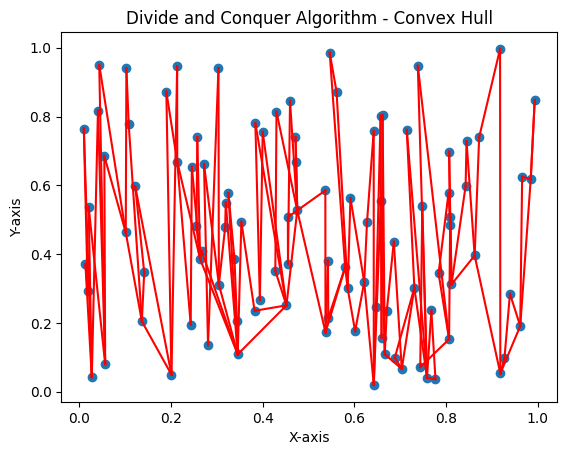

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def orientation(p, q, r):
    return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

def merge_hulls(left_hull, right_hull):
    def rightmost_point(points):
        max_point = points[0]
        for point in points[1:]:
            if point[0] > max_point[0]:
                max_point = point
        return max_point

    def leftmost_point(points):
        min_point = points[0]
        for point in points[1:]:
            if point[0] < min_point[0]:
                min_point = point
        return min_point

    leftmost = leftmost_point(right_hull)
    rightmost = rightmost_point(left_hull)

    upper_tangent = (rightmost, leftmost)
    lower_tangent = (rightmost, leftmost)

    i, j = left_hull.index(rightmost), right_hull.index(leftmost)

    while True:
        if orientation(left_hull[i], right_hull[j], right_hull[(j + 1) % len(right_hull)]) <= 0:
            j = (j + 1) % len(right_hull)
        elif orientation(left_hull[i], right_hull[j], left_hull[(i - 1) % len(left_hull)]) >= 0:
            i = (i - 1) % len(left_hull)
        else:
            break

    while True:
        if orientation(left_hull[i], right_hull[j], right_hull[(j - 1) % len(right_hull)]) >= 0:
            j = (j - 1) % len(right_hull)
        elif orientation(left_hull[i], right_hull[j], left_hull[(i + 1) % len(left_hull)]) <= 0:
            i = (i + 1) % len(left_hull)
        else:
            break

    return left_hull[:i + 1] + right_hull[j:] + right_hull[:j + 1] + left_hull[i + 1:]

def divide_and_conquer(points):
    if len(points) <= 3:
        return points

    points = sorted(points)
    mid = len(points) // 2
    left_hull = divide_and_conquer(points[:mid])
    right_hull = divide_and_conquer(points[mid:])

    return merge_hulls(left_hull, right_hull)

points = np.random.rand(100, 2)
hull = divide_and_conquer(points.tolist())

plt.scatter(points[:, 0], points[:, 1])
for i in range(len(hull)):
    plt.plot([hull[i][0], hull[(i + 1) % len(hull)][0]], [hull[i][1], hull[(i + 1) % len(hull)][1]], 'r-')
plt.title("Divide and Conquer Algorithm - Convex Hull")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


Αλγόριθμος Quickhull

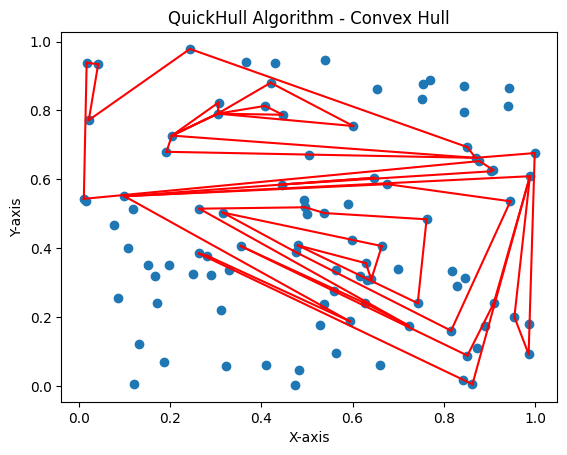

In [5]:
def quick_hull(points):
    if len(points) <= 3:
        return points

    def distance(point, line):
        return np.abs((line[1][1] - line[0][1]) * point[0] -
                      (line[1][0] - line[0][0]) * point[1] +
                      line[1][0] * line[0][1] -
                      line[1][1] * line[0][0]) / np.linalg.norm(np.array(line[1]) - np.array(line[0]))

    def farthest_point(points, line):
        return max(points, key=lambda point: distance(point, line))

    def split_points(points, line):
        left_set, right_set = [], []
        for point in points:
            if np.cross(np.array(line[1]) - np.array(line[0]), np.array(point) - np.array(line[0])) > 0:
                left_set.append(point)
            elif np.cross(np.array(line[1]) - np.array(line[0]), np.array(point) - np.array(line[0])) < 0:
                right_set.append(point)
        return left_set, right_set

    def find_hull(points, line):
        if not points:
            return []
        farthest = farthest_point(points, line)
        left_set, _ = split_points(points, [line[0], farthest])
        _, right_set = split_points(points, [farthest, line[1]])
        return find_hull(left_set, [line[0], farthest]) + [farthest] + find_hull(right_set, [farthest, line[1]])

    min_point = min(points, key=lambda point: point[0])
    max_point = max(points, key=lambda point: point[0])
    left_set, right_set = split_points(points, [min_point, max_point])

    return [min_point] + find_hull(left_set, [min_point, max_point]) + [max_point] + find_hull(right_set, [max_point, min_point])

points = np.random.rand(100, 2)
hull = quick_hull(points.tolist())

plt.scatter(points[:, 0], points[:, 1])
for i in range(len(hull)):
    plt.plot([hull[i][0], hull[(i + 1) % len(hull)][0]], [hull[i][1], hull[(i + 1) % len(hull)][1]], 'r-')
plt.title("QuickHull Algorithm - Convex Hull")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


2.

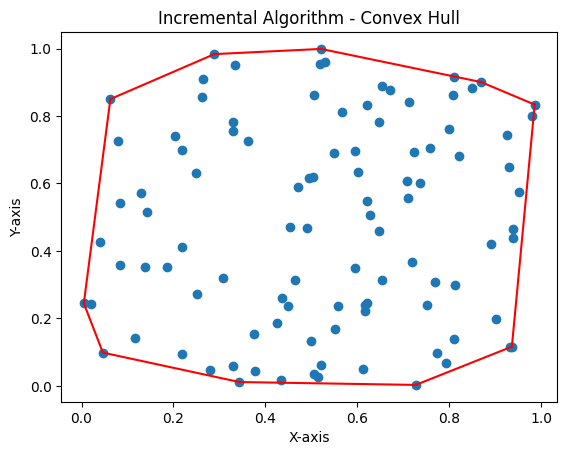

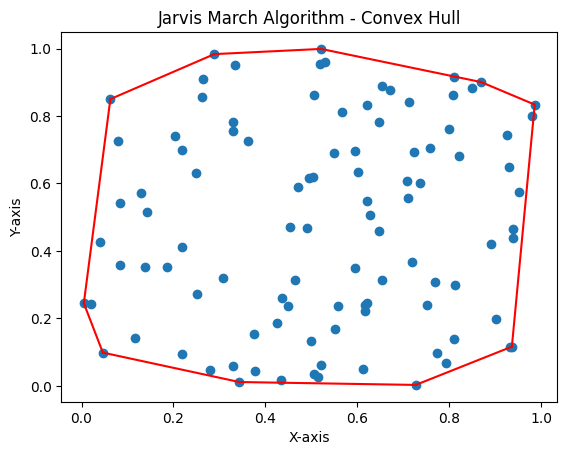

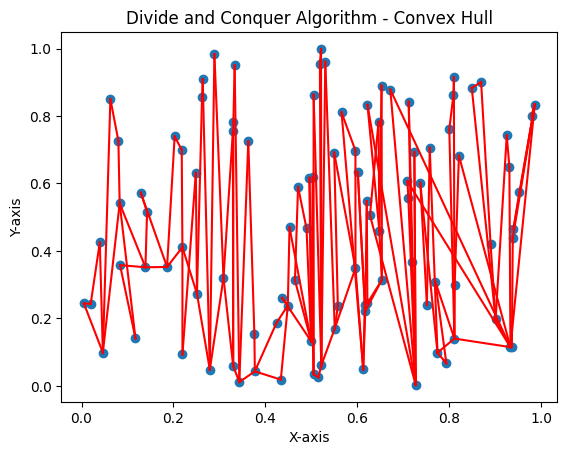

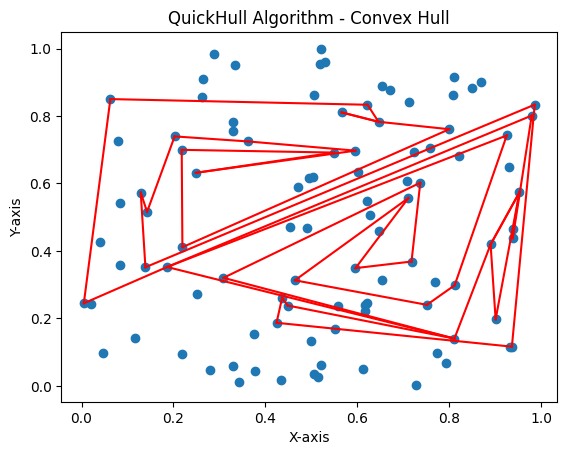

Incremental Hull: [[0.004982389115586572, 0.24496016286052968], [0.046368714831029445, 0.0986926965393331], [0.34324061851505694, 0.011482299396089135], [0.726938090854688, 0.002893469744314703], [0.9361163360857303, 0.11631621298705364], [0.9858417911337335, 0.8338064761339852], [0.8691763457066686, 0.9006676081034628], [0.5209936644358356, 0.9989349822059792], [0.2890322979252452, 0.9835493139198815], [0.06273381208037421, 0.8502331160367896]]
Jarvis March Hull: [[0.004982389115586572, 0.24496016286052968], [0.06273381208037421, 0.8502331160367896], [0.2890322979252452, 0.9835493139198815], [0.5209936644358356, 0.9989349822059792], [0.8691763457066686, 0.9006676081034628], [0.9858417911337335, 0.8338064761339852], [0.9361163360857303, 0.11631621298705364], [0.726938090854688, 0.002893469744314703], [0.34324061851505694, 0.011482299396089135], [0.046368714831029445, 0.0986926965393331]]
Divide and Conquer Hull: [[0.004982389115586572, 0.24496016286052968], [0.019860114923067718, 0.242

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Συνάρτηση για την οπτικοποίηση του κυρτού περιβλήματος
def plot_convex_hull(points, hull, title):
    plt.scatter(points[:, 0], points[:, 1])
    for i in range(len(hull)):
        plt.plot([hull[i][0], hull[(i + 1) % len(hull)][0]], [hull[i][1], hull[(i + 1) % len(hull)][1]], 'r-')
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

# Συνάρτηση για τον αυξητικό αλγόριθμο
def point_location(p, q, r):
    return (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])

def increment_algorithm(points):
    points = sorted(points)
    n = len(points)
    if n <= 3:
        return points

    upper_hull = []
    for point in points:
        while len(upper_hull) >= 2 and point_location(upper_hull[-2], upper_hull[-1], point) <= 0:
            upper_hull.pop()
        upper_hull.append(point)

    lower_hull = []
    for point in reversed(points):
        while len(lower_hull) >= 2 and point_location(lower_hull[-2], lower_hull[-1], point) <= 0:
            lower_hull.pop()
        lower_hull.append(point)

    return upper_hull[:-1] + lower_hull[:-1]

# Συνάρτηση για τον αλγόριθμο περιτυλίγματος (Jarvis March)
def jarvis_march(points):
    def leftmost_point(points):
        min_point = points[0]
        for point in points[1:]:
            if point[0] < min_point[0]:
                min_point = point
        return min_point

    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    hull = []
    leftmost = leftmost_point(points)
    current_point = leftmost
    while True:
        hull.append(current_point)
        next_point = points[0]
        for point in points:
            if point == current_point:
                continue
            if next_point == current_point or orientation(current_point, next_point, point) < 0:
                next_point = point
        current_point = next_point
        if current_point == leftmost:
            break

    return hull

# Συνάρτηση για τον αλγόριθμο διαίρει και βασίλευε
def orientation(p, q, r):
    return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

def merge_hulls(left_hull, right_hull):
    def rightmost_point(points):
        max_point = points[0]
        for point in points[1:]:
            if point[0] > max_point[0]:
                max_point = point
        return max_point

    def leftmost_point(points):
        min_point = points[0]
        for point in points[1:]:
            if point[0] < min_point[0]:
                min_point = point
        return min_point

    leftmost = leftmost_point(right_hull)
    rightmost = rightmost_point(left_hull)

    upper_tangent = (rightmost, leftmost)
    lower_tangent = (rightmost, leftmost)

    i, j = left_hull.index(rightmost), right_hull.index(leftmost)

    while True:
        if orientation(left_hull[i], right_hull[j], right_hull[(j + 1) % len(right_hull)]) <= 0:
            j = (j + 1) % len(right_hull)
        elif orientation(left_hull[i], right_hull[j], left_hull[(i - 1) % len(left_hull)]) >= 0:
            i = (i - 1) % len(left_hull)
        else:
            break

    while True:
        if orientation(left_hull[i], right_hull[j], right_hull[(j - 1) % len(right_hull)]) >= 0:
            j = (j - 1) % len(right_hull)
        elif orientation(left_hull[i], right_hull[j], left_hull[(i + 1) % len(left_hull)]) <= 0:
            i = (i + 1) % len(left_hull)
        else:
            break

    return left_hull[:i + 1] + right_hull[j:] + right_hull[:j + 1] + left_hull[i + 1:]

def divide_and_conquer(points):
    if len(points) <= 3:
        return points

    points = sorted(points)
    mid = len(points) // 2
    left_hull = divide_and_conquer(points[:mid])
    right_hull = divide_and_conquer(points[mid:])

    return merge_hulls(left_hull, right_hull)

# Συνάρτηση για τον αλγόριθμο QuickHull
def quick_hull(points):
    if len(points) <= 3:
        return points

    def distance(point, line):
        return np.abs((line[1][1] - line[0][1]) * point[0] -
                      (line[1][0] - line[0][0]) * point[1] +
                      line[1][0] * line[0][1] -
                      line[1][1] * line[0][0]) / np.linalg.norm(np.array(line[1]) - np.array(line[0]))

    def farthest_point(points, line):
        return max(points, key=lambda point: distance(point, line))

    def split_points(points, line):
        left_set, right_set = [], []
        for point in points:
            if np.cross(np.array(line[1]) - np.array(line[0]), np.array(point) - np.array(line[0])) > 0:
                left_set.append(point)
            elif np.cross(np.array(line[1]) - np.array(line[0]), np.array(point) - np.array(line[0])) < 0:
                right_set.append(point)
        return left_set, right_set

    def find_hull(points, line):
        if not points:
            return []
        farthest = farthest_point(points, line)
        left_set, _ = split_points(points, [line[0], farthest])
        _, right_set = split_points(points, [farthest, line[1]])
        return find_hull(left_set, [line[0], farthest]) + [farthest] + find_hull(right_set, [farthest, line[1]])

    min_point = min(points, key=lambda point: point[0])
    max_point = max(points, key=lambda point: point[0])
    left_set, right_set = split_points(points, [min_point, max_point])

    return [min_point] + find_hull(left_set, [min_point, max_point]) + [max_point] + find_hull(right_set, [max_point, min_point])

# Δημιουργία 100 τυχαίων σημείων
points = np.random.rand(100, 2)

# Εφαρμογή των αλγορίθμων
hull_incremental = increment_algorithm(points.tolist())
hull_jarvis = jarvis_march(points.tolist())
hull_divide_conquer = divide_and_conquer(points.tolist())
hull_quickhull = quick_hull(points.tolist())

# Οπτικοποίηση των αποτελεσμάτων
plot_convex_hull(points, hull_incremental, "Incremental Algorithm - Convex Hull")
plot_convex_hull(points, hull_jarvis, "Jarvis March Algorithm - Convex Hull")
plot_convex_hull(points, hull_divide_conquer, "Divide and Conquer Algorithm - Convex Hull")
plot_convex_hull(points, hull_quickhull, "QuickHull Algorithm - Convex Hull")

# Σύγκριση των αποτελεσμάτων
print("Incremental Hull:", hull_incremental)
print("Jarvis March Hull:", hull_jarvis)
print("Divide and Conquer Hull:", hull_divide_conquer)
print("QuickHull Hull:", hull_quickhull)

# Έλεγχος αν υπάρχουν διαφορές στα αποτελέσματα
incremental_set = set(map(tuple, hull_incremental))
jarvis_set = set(map(tuple, hull_jarvis))
divide_conquer_set = set(map(tuple, hull_divide_conquer))
quickhull_set = set(map(tuple, hull_quickhull))

print("Incremental vs Jarvis:", incremental_set == jarvis_set)
print("Incremental vs Divide and Conquer:", incremental_set == divide_conquer_set)
print("Incremental vs QuickHull:", incremental_set == quickhull_set)
print("Jarvis vs Divide and Conquer:", jarvis_set == divide_conquer_set)
print("Jarvis vs QuickHull:", jarvis_set == quickhull_set)
print("Divide and Conquer vs QuickHull:", divide_conquer_set == quickhull_set)


3.

Όταν κάποια από τα δοσμένα σημεία είναι συνευθειακά, οι τέσσερις αλγόριθμοι επηρεάζονται ως εξής:

### Αυξητικός Αλγόριθμος
- **Ευαισθησία**: Τα συνευθειακά σημεία μπορούν να προστεθούν και να αφαιρεθούν κατά τη διαδικασία ενημέρωσης του κυρτού περιβλήματος, κάτι που αυξάνει τον υπολογιστικό φόρτο.
- **Αποδοτικότητα**: Ο χρόνος εκτέλεσης μπορεί να αυξηθεί λόγω των πολλαπλών επαναϋπολογισμών για την αφαίρεση περιττών σημείων.

### Αλγόριθμος Περιτυλίγματος (Jarvis March)
- **Ευαισθησία**: Ο αλγόριθμος μπορεί να περιλάβει όλα τα συνευθειακά σημεία στο κυρτό περίβλημα, γεγονός που δεν είναι επιθυμητό καθώς δεν προσφέρουν επιπλέον πληροφορία.
- **Αποδοτικότητα**: Ο χρόνος εκτέλεσης παραμένει σταθερός \(O(nh)\), όπου \(h\) είναι ο αριθμός των σημείων στο κυρτό περίβλημα, αλλά περιλαμβάνει επιπλέον περιττά σημεία.

### Αλγόριθμος Διαίρει και Βασίλευε
- **Ευαισθησία**: Αντιμετωπίζει δυσκολίες στον υπολογισμό των τανζεντών όταν τα σημεία είναι συνευθειακά. Παρόλα αυτά, συνήθως διαχειρίζεται καλά τέτοιες καταστάσεις.
- **Αποδοτικότητα**: Ο αλγόριθμος παραμένει αποδοτικός \(O(n \log n)\), αλλά μπορεί να απαιτεί επιπλέον έλεγχο για την αφαίρεση συνευθειακών σημείων από το τελικό περίβλημα.

### Αλγόριθμος QuickHull
- **Ευαισθησία**: Μπορεί να περιλάβει όλα τα συνευθειακά σημεία στο κυρτό περίβλημα, παρόμοια με τον αλγόριθμο περιτυλίγματος.
- **Αποδοτικότητα**: Συνήθως παραμένει γρήγορος, αλλά η ύπαρξη πολλών συνευθειακών σημείων μπορεί να αυξήσει τον αριθμό των αναδρομικών κλήσεων και να προσθέσει περιττούς υπολογισμούς.

### Συνοψίζοντας
- **Αυξητικός**: Αυξημένος υπολογιστικός φόρτος λόγω ενημερώσεων.
- **Περιτύλιγμα**: Περιλαμβάνει περιττά συνευθειακά σημεία.
- **Διαίρει και Βασίλευε**: Χρειάζεται επιπλέον έλεγχο για συνευθειακά σημεία.
- **QuickHull**: Περιλαμβάνει περιττά συνευθειακά σημεία, αυξάνοντας τον αριθμό υπολογισμών.

Η συνολική αποδοτικότητα και τα αποτελέσματα μπορεί να διαφέρουν λόγω της παρουσίας συνευθειακών σημείων, αλλά όλοι οι αλγόριθμοι είναι ικανοί να διαχειριστούν την κατάσταση με τον δικό τους τρόπο.

4.

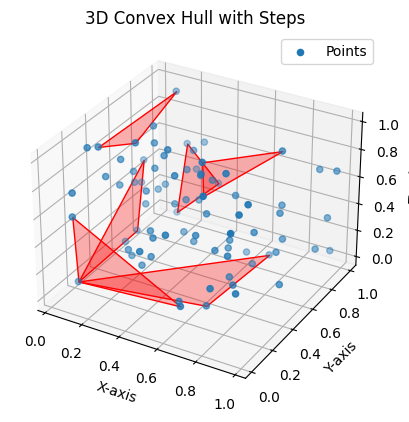

In [10]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def quickhull_3d(points):
    hull = ConvexHull(points)
    return hull

def plot_convex_hull_3d(points, hull, step):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], label='Points')

    for i, simplex in enumerate(hull.simplices):
        if i % step == 0:
            triangle = [points[simplex[0]], points[simplex[1]], points[simplex[2]]]
            ax.add_collection3d(Poly3DCollection([triangle], color='red', alpha=0.3))

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.title("3D Convex Hull with Steps")
    plt.legend()
    plt.show()

# Δημιουργία 85 τυχαίων σημείων στον χώρο R3
points_3d = np.random.rand(85, 3)

# Εφαρμογή του αλγορίθμου QuickHull για 3 διαστάσεις
hull_3d = quickhull_3d(points_3d)

# Οπτικοποίηση του κυρτού περιβλήματος σε βήματα
plot_convex_hull_3d(points_3d, hull_3d, step=10)  # Οπτικοποίηση κάθε 10 βημάτων


5.

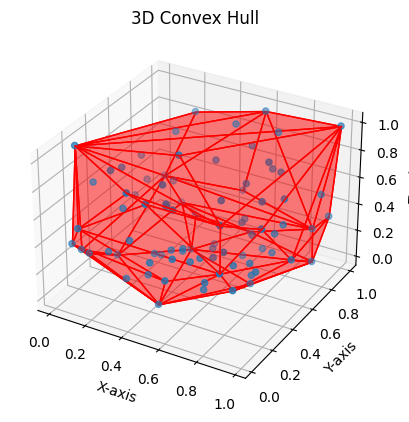

In [9]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def quickhull_3d(points):
    hull = ConvexHull(points)
    return hull

def plot_convex_hull_3d(points, hull):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2])

    for simplex in hull.simplices:
        triangle = [points[simplex[0]], points[simplex[1]], points[simplex[2]]]
        ax.add_collection3d(Poly3DCollection([triangle], color='red', alpha=0.3))

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.title("3D Convex Hull")
    plt.show()

# Δημιουργία 85 τυχαίων σημείων στον χώρο R3
points_3d = np.random.rand(85, 3)

# Εφαρμογή του αλγορίθμου QuickHull για 3 διαστάσεις
hull_3d = quickhull_3d(points_3d)

# Οπτικοποίηση του κυρτού περιβλήματος
plot_convex_hull_3d(points_3d, hull_3d)


6.

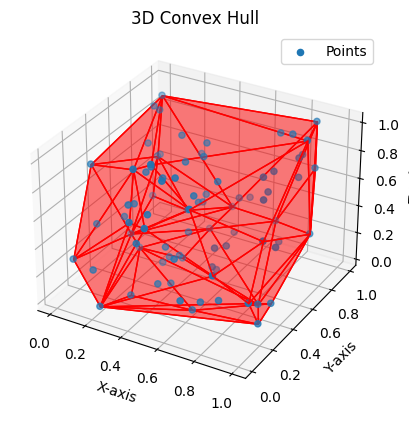

In [11]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def quickhull_3d(points):
    hull = ConvexHull(points)
    return hull

def plot_convex_hull_3d(points, hull):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], label='Points')

    for simplex in hull.simplices:
        triangle = [points[simplex[0]], points[simplex[1]], points[simplex[2]]]
        ax.add_collection3d(Poly3DCollection([triangle], color='red', alpha=0.3))

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.title("3D Convex Hull")
    plt.legend()
    plt.show()

# Δημιουργία 85 τυχαίων σημείων στον χώρο R3
points_3d = np.random.rand(85, 3)

# Εφαρμογή του αλγορίθμου QuickHull για 3 διαστάσεις
hull_3d = quickhull_3d(points_3d)

# Οπτικοποίηση του κυρτού περιβλήματος
plot_convex_hull_3d(points_3d, hull_3d)


Υλοποίηση **Β**

1. & 2.

In [14]:
import numpy as np
from scipy.optimize import linprog

def incremental_linear_programming(c, A, b):
    # Αρχική λύση χωρίς περιορισμούς
    res = linprog(c, bounds=[(0, None), (0, None)], method='highs')
    if res.success:
        print(f'Initial solution: {res.x}, Objective value: {-res.fun}')
    else:
        print('Initial problem is infeasible')

    # Προσθήκη περιορισμών ένας-ένας
    for i in range(len(b)):
        A_sub = A[:i+1]
        b_sub = b[:i+1]
        res = linprog(c, A_ub=A_sub, b_ub=b_sub, bounds=[(0, None), (0, None)], method='highs')
        if res.success:
            print(f'Solution after adding constraint {i+1}: {res.x}, Objective value: {-res.fun}')
        else:
            print(f'Problem infeasible after adding constraint {i+1}')
            break

    return res

# Ορισμός του προβλήματος
c = [-3, 12]  # Συντελεστές της συνάρτησης στόχου (max -3x1 + 12x2)
A = [
    [1, -2],
    [2, -3],
    [-1, 3],
    [-1, 6],
    [4, -9],
    [-1, 0],  # x1 >= 0
    [0, -1]   # x2 >= 0
]  # Συντελεστές των περιορισμών
b = [1, 6, 0, 12, 27, 0, 0]  # Δεξιά μέλη των περιορισμών

# Εκτέλεση του αυξητικού αλγορίθμου
result = incremental_linear_programming(c, A, b)

# Τελική λύση
if result.success:
    print(f'Final solution: {result.x}, Final objective value: {-result.fun}')
else:
    print('Final problem is infeasible')


Initial problem is infeasible
Solution after adding constraint 1: [1. 0.], Objective value: 3.0
Solution after adding constraint 2: [1. 0.], Objective value: 3.0
Solution after adding constraint 3: [1. 0.], Objective value: 3.0
Solution after adding constraint 4: [1. 0.], Objective value: 3.0
Solution after adding constraint 5: [1. 0.], Objective value: 3.0
Solution after adding constraint 6: [1. 0.], Objective value: 3.0
Solution after adding constraint 7: [1. 0.], Objective value: 3.0
Final solution: [1. 0.], Final objective value: 3.0


**Υλοποίηση Γ**

1.

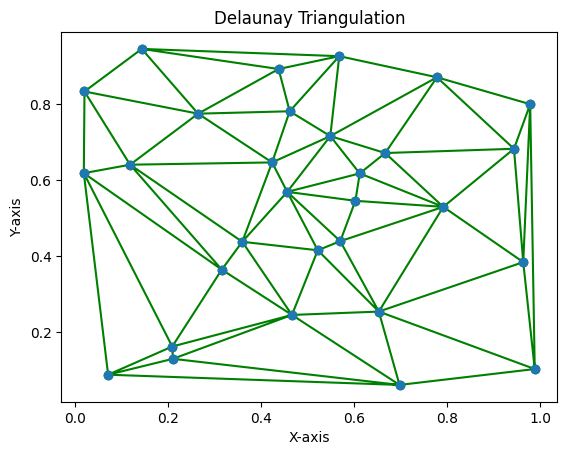

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Δημιουργία τυχαίων σημείων
np.random.seed(0)
points = np.random.rand(30, 2)

# Υπολογισμός της τριγωνοποίησης Delaunay
tri = Delaunay(points)

# Σχεδίαση των σημείων και των τριγώνων
plt.triplot(points[:,0], points[:,1], tri.simplices, 'go-')
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Delaunay Triangulation")
plt.show()


2.

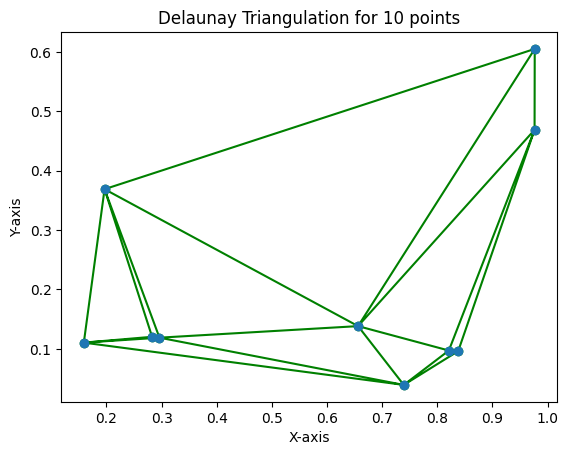

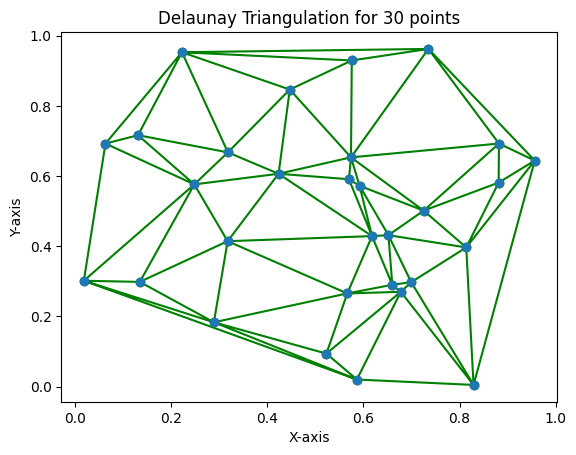

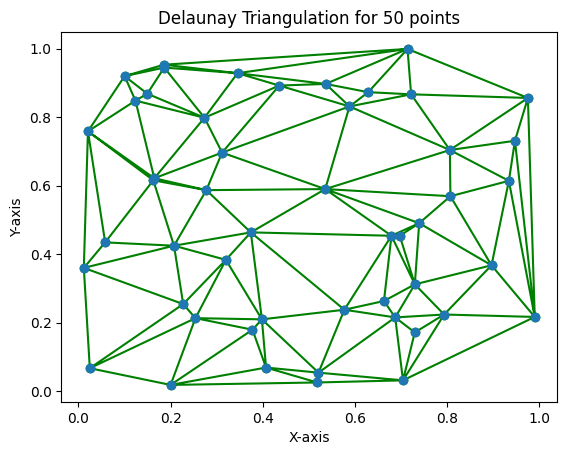

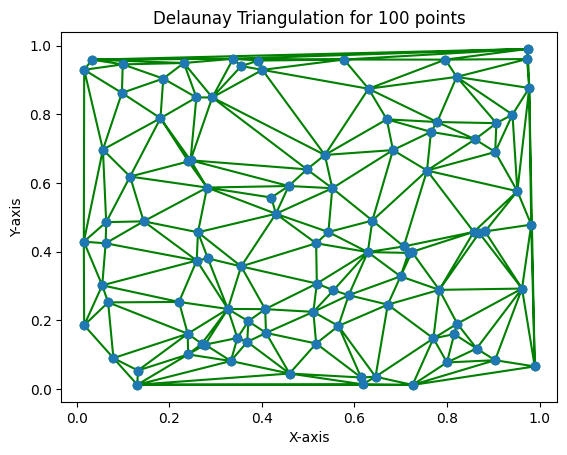

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def plot_delaunay(points):
    tri = Delaunay(points)
    plt.triplot(points[:,0], points[:,1], tri.simplices, 'go-')
    plt.plot(points[:,0], points[:,1], 'o')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"Delaunay Triangulation for {len(points)} points")
    plt.show()

# Δοκιμές με διαφορετικά πλήθη σημείων
for n in [10, 30, 50, 100]:
    points = np.random.rand(n, 2)
    plot_delaunay(points)


#### Συμπεριφορά του Αλγορίθμου με την Αύξηση του Πλήθους των Σημείων

1. **Χρόνος Εκτέλεσης**:
   - Ο αλγόριθμος Delaunay έχει μέση χρονική πολυπλοκότητα \(O(n \log n)\) για \(n\) σημεία. Καθώς αυξάνεται ο αριθμός των σημείων, ο χρόνος εκτέλεσης αυξάνεται αναλογικά με το \(n \log n\).
   - Σε πραγματικές εφαρμογές, ο χρόνος εκτέλεσης είναι αποδεκτός ακόμα και για μεγάλα πλήθη σημείων λόγω της αποδοτικότητας των σύγχρονων υλοποιήσεων.

2. **Πολυπλοκότητα Τριγωνοποίησης**:
   - Καθώς αυξάνεται ο αριθμός των σημείων, ο αριθμός των τριγώνων που δημιουργούνται αυξάνεται. Σε μια τυχαία κατανομή σημείων στο επίπεδο, ο αριθμός των τριγώνων είναι περίπου \(2n - 5\), όπου \(n\) είναι ο αριθμός των σημείων.
   - Αυτό σημαίνει ότι η δομή της τριγωνοποίησης γίνεται πιο περίπλοκη με περισσότερα τρίγωνα και ακμές, αλλά παραμένει διαχειρίσιμη λόγω της πολυπλοκότητας \(O(n \log n)\).

3. **Ακρίβεια και Σταθερότητα**:
   - Η τριγωνοποίηση Delaunay διασφαλίζει ότι δεν υπάρχουν σημεία μέσα στον περιγεγραμμένο κύκλο κανενός τριγώνου της τριγωνοποίησης, κάτι που την καθιστά γεωμετρικά σταθερή και αξιόπιστη ακόμα και για μεγάλα σύνολα δεδομένων.
   - Η ποιότητα των τριγώνων παραμένει υψηλή, καθώς η τριγωνοποίηση τείνει να αποφεύγει την δημιουργία μακρόστενων τριγώνων, κάτι που είναι επιθυμητό για πολλές γεωμετρικές και επιστημονικές εφαρμογές.

4. **Εφαρμογές**:
   - Η τριγωνοποίηση Delaunay χρησιμοποιείται σε πολλές περιοχές, όπως η γεωμετρία των υπολογιστών, η γραφική παράσταση, η γεωγραφική πληροφορική, η φυσική και η μηχανική. Η αποδοτικότητά της και η ποιότητα των τριγώνων την καθιστούν κατάλληλη για εφαρμογές που απαιτούν ακριβή και αποδοτική επεξεργασία γεωμετρικών δεδομένων.

Συνοψίζοντας, ο αλγόριθμος Delaunay είναι πολύ αποδοτικός και κλιμακώνεται καλά με την αύξηση του αριθμού των σημείων, διατηρώντας την ακρίβεια και την ποιότητα της τριγωνοποίησης.

**Υλοποίηση Δ**

1.

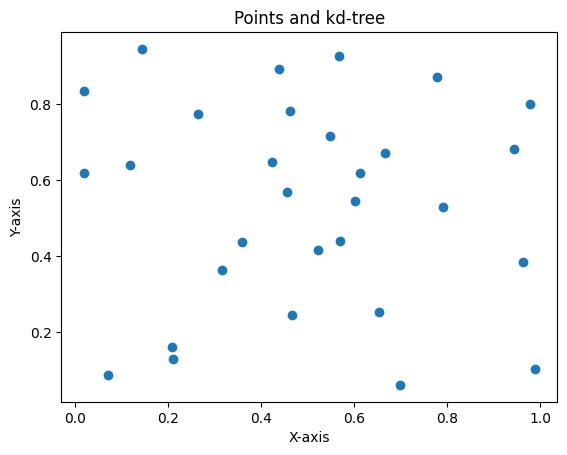

In [17]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# Δημιουργία τυχαίων σημείων
np.random.seed(0)
points = np.random.rand(30, 2)

# Κατασκευή του kd-tree
kd_tree = KDTree(points)

# Εμφάνιση των σημείων
plt.scatter(points[:,0], points[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Points and kd-tree")
plt.show()

2.

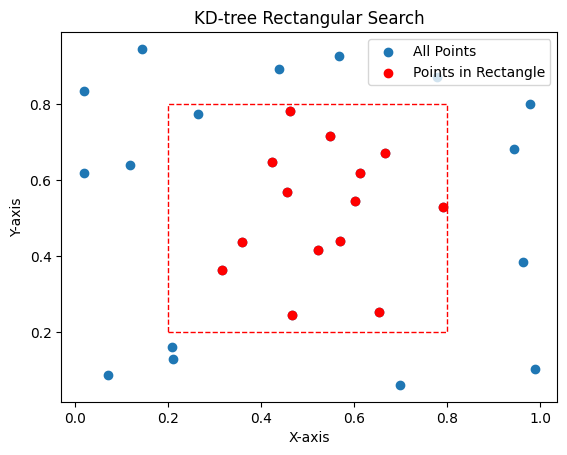

Points in rectangle: [array([0.31542835, 0.36371077]), array([0.46631077, 0.24442559]), array([0.3595079 , 0.43703195]), array([0.45615033, 0.56843395]), array([0.4236548 , 0.64589411]), array([0.46147936, 0.78052918]), array([0.52184832, 0.41466194]), array([0.65310833, 0.2532916 ]), array([0.79172504, 0.52889492]), array([0.57019677, 0.43860151]), array([0.60276338, 0.54488318]), array([0.61209572, 0.616934  ]), array([0.66676672, 0.67063787]), array([0.5488135 , 0.71518937])]


In [18]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# Δημιουργία τυχαίων σημείων
np.random.seed(0)
points = np.random.rand(30, 2)

# Κατασκευή του kd-tree
kd_tree = KDTree(points)

# Ορθογώνια αναζήτηση
def rectangular_search(kd_tree, rect):
    """
    Εκτελεί ορθογώνια αναζήτηση στο kd-tree.

    Parameters:
    kd_tree (KDTree): Το kd-tree που περιέχει τα σημεία.
    rect (tuple): Το ορθογώνιο αναζήτησης, ορισμένο ως ((xmin, ymin), (xmax, ymax)).

    Returns:
    list: Τα σημεία που βρίσκονται εντός του ορθογωνίου.
    """
    xmin, ymin = rect[0]
    xmax, ymax = rect[1]
    indices = kd_tree.query_ball_point([(xmin + xmax) / 2, (ymin + ymax) / 2], max(xmax - xmin, ymax - ymin) / 2)
    points_in_rect = [point for point in points[indices] if xmin <= point[0] <= xmax and ymin <= point[1] <= ymax]
    return points_in_rect

# Ορθογώνιο αναζήτησης
rect = ((0.2, 0.2), (0.8, 0.8))

# Εκτέλεση της ορθογώνιας αναζήτησης
points_in_rect = rectangular_search(kd_tree, rect)

# Εμφάνιση των σημείων και του ορθογωνίου αναζήτησης
plt.scatter(points[:,0], points[:,1], label='All Points')
plt.scatter(*zip(*points_in_rect), color='red', label='Points in Rectangle')
rect_patch = plt.Rectangle(rect[0], rect[1][0] - rect[0][0], rect[1][1] - rect[0][1], fill=None, edgecolor='r', linestyle='--')
plt.gca().add_patch(rect_patch)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("KD-tree Rectangular Search")
plt.legend()
plt.show()

# Εκτύπωση των σημείων που βρίσκονται εντός του ορθογωνίου
print("Points in rectangle:", points_in_rect)


3.

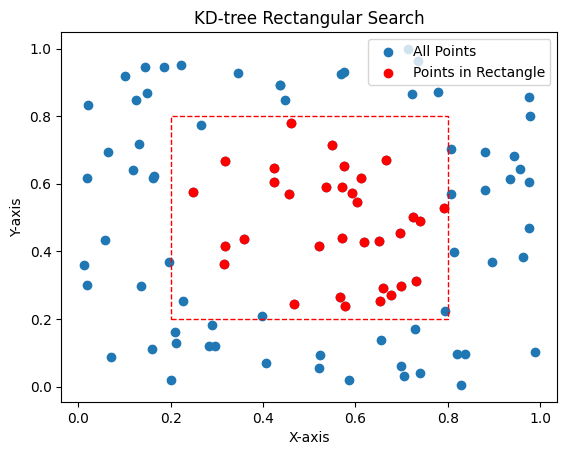

Points in rectangle: [array([0.46631077, 0.24442559]), array([0.56660145, 0.26538949]), array([0.31542835, 0.36371077]), array([0.3595079 , 0.43703195]), array([0.52184832, 0.41466194]), array([0.31798318, 0.41426299]), array([0.57019677, 0.43860151]), array([0.57722859, 0.23789282]), array([0.67781654, 0.27000797]), array([0.65310833, 0.2532916 ]), array([0.66017354, 0.29007761]), array([0.61801543, 0.4287687 ]), array([0.65210327, 0.43141844]), array([0.69742877, 0.45354268]), array([0.69947928, 0.29743695]), array([0.7395508 , 0.49045881]), array([0.73012203, 0.311945  ]), array([0.24875314, 0.57615733]), array([0.45615033, 0.56843395]), array([0.31856895, 0.66741038]), array([0.4236548 , 0.64589411]), array([0.5356328 , 0.58990998]), array([0.42385505, 0.60639321]), array([0.46147936, 0.78052918]), array([0.61209572, 0.616934  ]), array([0.57432525, 0.65320082]), array([0.60276338, 0.54488318]), array([0.56996491, 0.59087276]), array([0.59204193, 0.57225191]), array([0.72525428, 0.

In [19]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# Δημιουργία 100 τυχαίων σημείων
np.random.seed(0)
points = np.random.rand(100, 2)

# Κατασκευή του kd-tree
kd_tree = KDTree(points)

# Ορθογώνια αναζήτηση
def rectangular_search(kd_tree, rect):
    """
    Εκτελεί ορθογώνια αναζήτηση στο kd-tree.

    Parameters:
    kd_tree (KDTree): Το kd-tree που περιέχει τα σημεία.
    rect (tuple): Το ορθογώνιο αναζήτησης, ορισμένο ως ((xmin, ymin), (xmax, ymax)).

    Returns:
    list: Τα σημεία που βρίσκονται εντός του ορθογωνίου.
    """
    xmin, ymin = rect[0]
    xmax, ymax = rect[1]
    indices = kd_tree.query_ball_point([(xmin + xmax) / 2, (ymin + ymax) / 2], max(xmax - xmin, ymax - ymin) / 2)
    points_in_rect = [point for point in points[indices] if xmin <= point[0] <= xmax and ymin <= point[1] <= ymax]
    return points_in_rect

# Ορθογώνιο αναζήτησης
rect = ((0.2, 0.2), (0.8, 0.8))

# Εκτέλεση της ορθογώνιας αναζήτησης
points_in_rect = rectangular_search(kd_tree, rect)

# Εμφάνιση των σημείων και του ορθογωνίου αναζήτησης
plt.scatter(points[:,0], points[:,1], label='All Points')
plt.scatter(*zip(*points_in_rect), color='red', label='Points in Rectangle')
rect_patch = plt.Rectangle(rect[0], rect[1][0] - rect[0][0], rect[1][1] - rect[0][1], fill=None, edgecolor='r', linestyle='--')
plt.gca().add_patch(rect_patch)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("KD-tree Rectangular Search")
plt.legend()
plt.show()

# Εκτύπωση των σημείων που βρίσκονται εντός του ορθογωνίου
print("Points in rectangle:", points_in_rect)